## App Subscription - Binomial Classification

#### Import modules & Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('appdata10.csv')

####  EDA

In [4]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


* **Missing values in enrolled_date**
* **first_open  & enrolled_date are in object format - So need to convert them into date format**
* **hour also in object format**

In [6]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


#### Observations:

* Mean age of the users - 31
* 10.7% users played the minigame
* 17.2% users used the preminum featues
* **62.1% users were enrolled**
* 16.5% users liked 

In [7]:
pp.ProfileReport(data)

#### Target Analysis

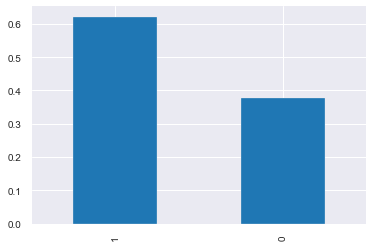

In [8]:
data['enrolled'].value_counts(normalize=True).plot('bar')

In [9]:
# taking only the hour value and Converting it into int 
data['hour'] = data['hour'].str.slice(1,3,1).astype(int)

In [10]:
data2 = data.copy().drop(columns = ['user', 'screen_list', 'enrolled_date','first_open', 'enrolled'] )
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


##### Histogram view - Numerical Variables

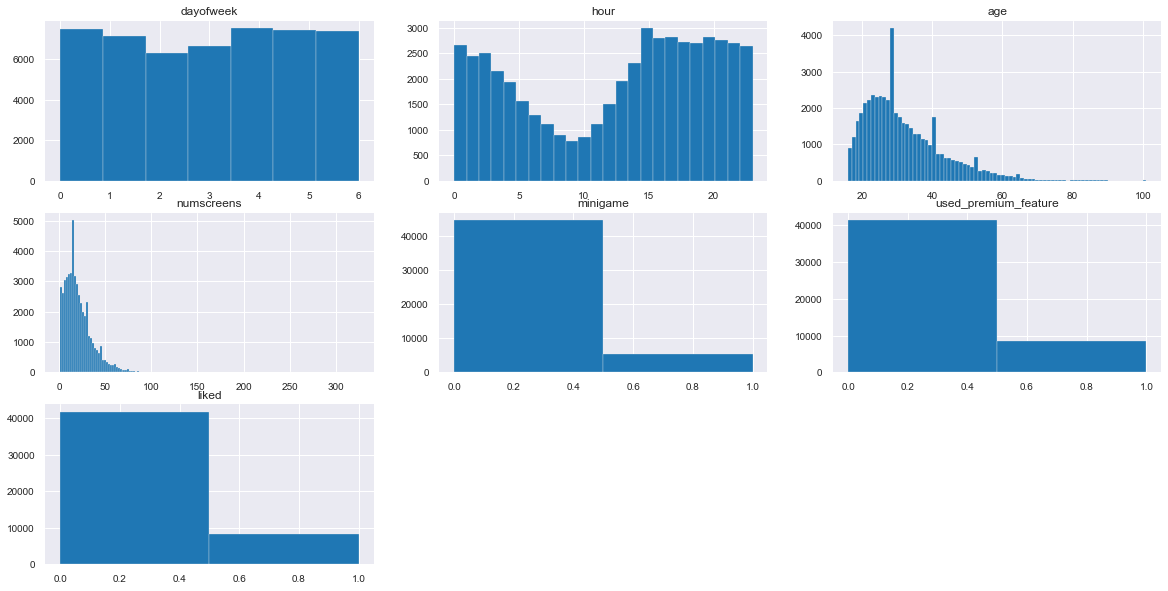

In [11]:
plt.figure(figsize=(20,10))
for i in range(1,data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    col = data2.columns.tolist()[i - 1]
    f.set_title(col)
    val = data2[col].nunique()
    plt.hist(data2[col], bins = val)    

#### Correction of independent variables with Target variable

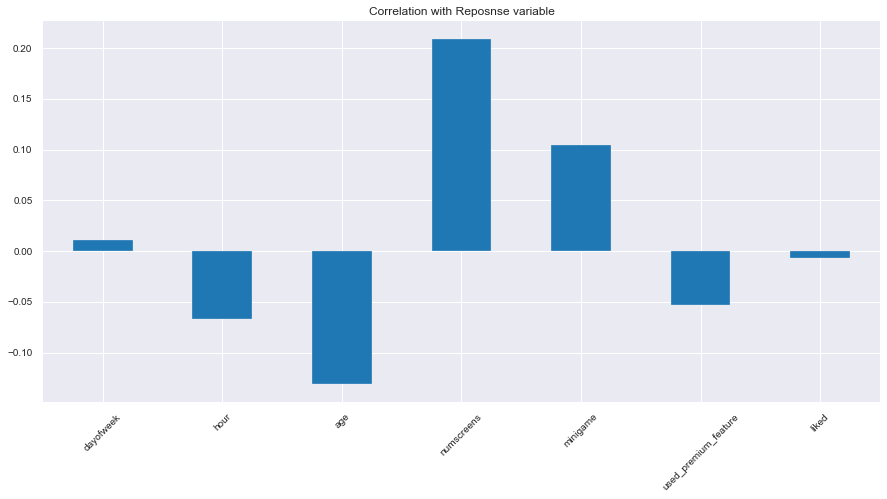

In [12]:
data2.corrwith(data['enrolled']).plot('bar', figsize=(15,7), rot =45, grid = True, title = 'Correlation with Reposnse variable')

* **'dayofweek', 'numscreens', 'minigame' is positive correlated with erolled**
* **'hour', 'age', 'used_premium_feature', 'liked' is negitively correlated with erolled**

#### Correlation matrix

In [13]:
corr = data2.corr()
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


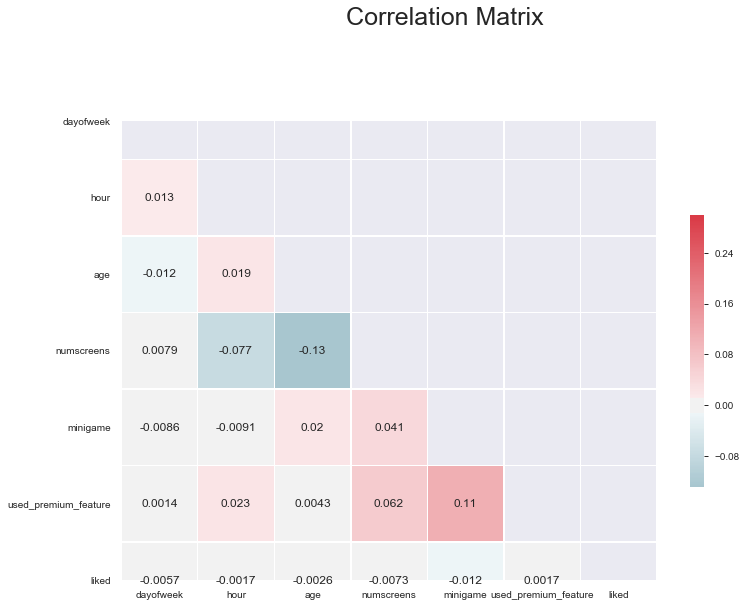

In [14]:
# plot dignal correlation matrix - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
f.suptitle("Correlation Matrix", fontsize = 25)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True, annot_kws={"size": 12})

**Data Understanding**

* 'dayofweek' - users used long hours in later part of the week and of them are youngster
* 'hour' - less numb od screen used at late hours
* 'age' - more younsters played the minigame & yougnsters used more screens
* 'numscreens' - more screens used more played minigame & used premium features
* 'minigame'- more played minigame then more used premium features

#### Feature Engineering

* Convert first_open & enrolled_date into date format 
* process the screen_list

In [15]:
# convert first_open & enrolled_date into date format 
data['first_open'] = pd.to_datetime(data['first_open']) 
data['enrolled_date'] = pd.to_datetime(data['enrolled_date'])

In [16]:
data['diff'] = (data['enrolled_date'] - data['first_open']).astype('timedelta64[h]')

In [17]:
# Analysing the diff data
diff = data['diff'].value_counts(normalize = True).rename_axis('hour').reset_index(name='values')

In [18]:
diff.head(5)

,hour,values
0,0.0,0.672105
1,1.0,0.020113
2,2.0,0.010845
3,3.0,0.006662
4,4.0,0.005117


In [19]:
till_48 = diff[diff['hour'].between(1, 48)]['values'].sum()
more_48 = diff[diff['hour'].between(49, diff['hour'].max())]['values'].sum()

print('Enrolled in first 1 hr is {0:.2f} %'.format((diff['values'][0]) *100))
print('Enrolled between 1 to 48hrs is {0:.2f} %'.format(till_48 *100))
print('Enrolled between 48hrs to 5434 hrs is {0:.2f} %'.format(more_48 *100))

Enrolled in first 1 hr is 67.21 %
Enrolled between 1 to 48hrs is 12.76 %
Enrolled between 48hrs to 5434 hrs is 20.03 %


**As 80% of the enrollements happen in less than 2 days( 48hrs). So we are considering only these enrollments**

<b>Remove the Enrollment if enrolled more than 48hrs</b>

In [20]:
data.loc[data['diff'] > 48, 'enrolled'] = 0

In [21]:
data.loc[data['diff'] > 48]['enrolled'].value_counts()

0    6224
Name: enrolled, dtype: int64

In [22]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked', 'diff'],
      dtype='object')

In [23]:
# we no longer need the date columns
data = data.drop(columns=['enrolled_date', 'diff', 'first_open'])

#### Process the screen_list

In [24]:
top_screens = pd.read_csv('top_screens.csv')
top_screens = top_screens['top_screens'].values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [25]:
for i in top_screens:
    data[i] = data['screen_list'].str.contains(i).astype(int)
    data['screen_list'] = data['screen_list'].str.replace(i+',', '')
data['others'] = data['screen_list'].str.count(',')

In [26]:
data = data.drop(columns=['screen_list'])

In [27]:
# Funnels to group similar columns
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data["SavingCount"] = data[savings_screens].sum(axis=1)
data = data.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)
data = data.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount"] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)

In [28]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'others',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [29]:
#saving Results

data.to_csv('new_appdata10.csv', index = False)

### Machine Learning

#### Data Pre-processing

* Divide the data to X & y
* split it into train & test

In [30]:
X = data.drop(columns=['enrolled'])
y = data['enrolled']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [33]:
print('shape of X_train : ',X_train.shape)
print('shape of X_test : ',X_test.shape)
print('shape of y_train : ',y_train.shape)
print('shape of y_test : ',y_test.shape)

shape of X_train :  (40000, 49)
shape of X_test :  (10000, 49)
shape of y_train :  (40000,)
shape of y_test :  (10000,)


In [34]:
tr_vc = pd.DataFrame(y_train)
ts_vc = pd.DataFrame(y_test)

0    20120
1    19880
Name: enrolled, dtype: int64


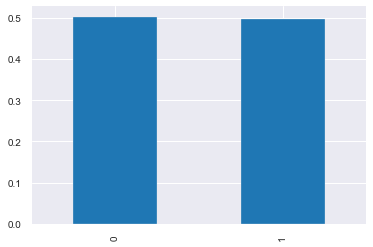

In [35]:
print(tr_vc['enrolled'].value_counts())
tr_vc['enrolled'].value_counts(normalize = True).plot.bar()

0    5030
1    4970
Name: enrolled, dtype: int64


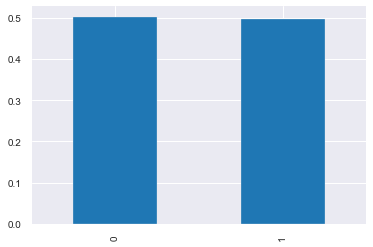

In [36]:
print(ts_vc['enrolled'].value_counts())
ts_vc['enrolled'].value_counts(normalize = True).plot.bar()

**Similar distribution of Target variable in both train & test**

In [37]:
# Create the train & test identity
X_train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])

X_test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [38]:
# Standard scaling of all the independent columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# As StandardScaler looses index & column names we saving the results in other df
X_train1 = pd.DataFrame(sc.fit_transform(X_train))
X_test1 = pd.DataFrame(sc.transform(X_test))

In [39]:
X_train1.columns = X_train.columns.values
X_train1.index = X_train.index.values

X_test1.columns = X_test.columns.values
X_test1.index = X_test.index.values

In [40]:
X_train = X_train1
X_test = X_test1

#### Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')

classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

#### Model Evaluation

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

f1_scoreval = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

In [43]:
print('confusion matrix ')
print(cm)

confusion matrix 
[[3898 1132]
 [1170 3800]]


In [44]:
print('Accuracy of the model is: %0.3f' %(accuracy*100),'%')
print('f1_score of the model is: %0.3f' %(f1_scoreval))
print('precision of the model is: %0.3f' %(precision))
print('recall of the model is: %0.3f' %(recall))

Accuracy of the model is: 76.980 %
f1_score of the model is: 0.768
precision of the model is: 0.770
recall of the model is: 0.765


#### Applying k-Fold Cross Validation#### 

In [45]:
from sklearn.model_selection import cross_val_score
accu = cross_val_score(classifier,X_train, y_train, cv=10)

In [46]:
print('Logistic Regression Model accuracy is %0.3f (+/- %0.3f)' %(accu.mean(), accu.std()*2))

Logistic Regression Model accuracy is 0.766 (+/- 0.007)


#### Grid search for best parameters

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
paramas = {'C' : [0.1, 0.5, 0.9, 1, 2, 5], 'penalty' : ['l1', 'l2']}

gridcv = GridSearchCV(classifier, param_grid = paramas, scoring='accuracy',n_jobs=-1, refit=True)
gridcv.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [49]:
gridcv.best_params_

{'C': 2, 'penalty': 'l1'}

In [50]:
gridcv.best_score_

0.765475

In [51]:
y_predict = gridcv.predict(X_test)

cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

f1_scoreval = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('confusion matrix ')
print(cm)

print('Accuracy of the model is: %0.3f' %(accuracy*100),'%')
print('f1_score of the model is: %0.3f' %(f1_scoreval))
print('precision of the model is: %0.3f' %(precision))
print('recall of the model is: %0.3f' %(recall))

confusion matrix 
[[3898 1132]
 [1170 3800]]
Accuracy of the model is: 76.980 %
f1_score of the model is: 0.768
precision of the model is: 0.770
recall of the model is: 0.765


#### Formatting Final Results

In [52]:
final_results = pd.concat([X_test_identity, y_test], axis = 1).dropna()
final_results['enrolled_pred'] = y_predict

In [53]:
final_results = final_results.reset_index(drop=True)
final_results

,user,enrolled,enrolled_pred
0,114662,1,1
1,306322,0,0
2,334708,1,1
3,205568,0,0
4,365764,0,0
...,...,...,...
9995,348512,0,0
9996,71429,0,0
9997,133080,0,0
9998,365030,1,1


#### Application of AutoML - TPOT

In [55]:
from xgboost import XGBClassifier
exported_pipeline = XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=14, n_estimators=100, nthread=1, subsample=1.0)
exported_pipeline.fit(X_train, y_train)
y_tpot_pred = exported_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_tpot_pred)
accuracy = accuracy_score(y_test, y_tpot_pred)

f1_scoreval = f1_score(y_test, y_tpot_pred)
precision = precision_score(y_test, y_tpot_pred)
recall = recall_score(y_test, y_tpot_pred)

print('confusion matrix ')
print(cm)

print('Accuracy of the model is: %0.3f' %(accuracy*100),'%')
print('f1_score of the model is: %0.3f' %(f1_scoreval))
print('precision of the model is: %0.3f' %(precision))
print('recall of the model is: %0.3f' %(recall))

confusion matrix 
[[4168  862]
 [1258 3712]]
Accuracy of the model is: 78.800 %
f1_score of the model is: 0.778
precision of the model is: 0.812
recall of the model is: 0.747
